In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns 
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score 

df = pd.read_csv("Dataset//Attrition.csv")

In [7]:
to_push = ['Age', 'DistanceFromHome','Education','EnvironmentSatisfaction',
           'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
           'NumCompaniesWorked','RelationshipSatisfaction','TotalWorkingYears',
           'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
           'YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_2 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_3 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsMean'] 

to_push_4 = ['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
             'TotalWorkingYears','YearsAtCompany'] 

to_push_5 = ['Age', 'DistanceFromHome', 'MonthlyIncome']

In [40]:
pd.factorize(df['Attrition'])
to_clusterize = df[to_push_4]

for column in to_clusterize.columns: 
    if not is_numeric_dtype(to_clusterize[column]): 
        item = to_clusterize[column] 
        unique = list(to_clusterize[column].unique()) 
        mapping = dict(zip(unique, range(0, len(unique) + 1))) 
        to_clusterize[column] = item.map(mapping).astype(int)

to_clusterize.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany
0,52.000000,9,8446.0,9,20,8.0
1,36.000000,1,4834.0,1,21,1.0
2,35.906122,16,4768.0,1,7,1.0
3,33.000000,5,2799.0,2,12,3.0
4,37.252033,9,7978.0,1,2,10.0


In [41]:
#Executing kmeans on Train dataset, saving sse values on sse_values list
sse_values = list() 
max_k = 30
for k in range(2, max_k + 1): 
    kmeans = KMeans(n_clusters = k, max_iter = 100)
    kmeans.fit(to_clusterize)
    sse_values.append(kmeans.inertia_)

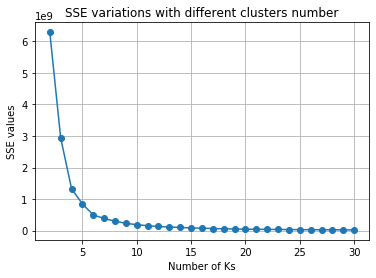

In [42]:
#Plotting values obtained calculating SSE 
plt.plot(range(2, max_k + 1), sse_values, marker = "o")
plt.grid(True)
plt.title("SSE variations with different clusters number")
plt.xlabel("Number of Ks")
plt.ylabel("SSE values")
plt.show()

In [43]:
#Calculating best number of clusters using Silhouette score 
from sklearn.metrics import silhouette_score

silh_values = list()
for k in range(2, max_k + 1): 
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(to_clusterize)
    labels_k = kmeans.labels_
    score_k = silhouette_score(to_clusterize, labels_k)
    silh_values.append(score_k)

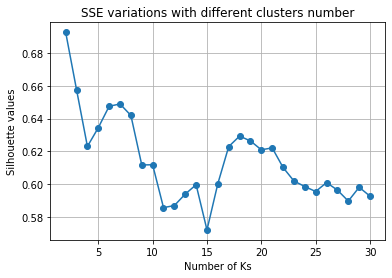

In [44]:
#Plotting Silhouette Score
plt.plot(range(2, max_k + 1), silh_values, marker = "o")
plt.grid(True)
plt.title("SSE variations with different clusters number")
plt.xlabel("Number of Ks")
plt.ylabel("Silhouette values")
plt.show()

In [45]:
#Computes KMeans with the selected number of clusters 
kmeans = KMeans(n_clusters = 5, max_iter = 100)
kmeans.fit(to_clusterize[to_push_5])
to_clusterize['cluster'] = kmeans.labels_  #saves the cluster where each entry has been inserted 
to_clusterize.head()

C:\Users\scucc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,cluster
0,52.000000,9,8446.0,9,20,8.0,2
1,36.000000,1,4834.0,1,21,1.0,1
2,35.906122,16,4768.0,1,7,1.0,1
3,33.000000,5,2799.0,2,12,3.0,4
4,37.252033,9,7978.0,1,2,10.0,2


In [46]:
kmeans.cluster_centers_ 

array([[4.48814604e+01, 9.47368421e+00, 1.32265088e+04],
       [3.66702876e+01, 9.15537849e+00, 5.48432124e+03],
       [4.03390199e+01, 8.47674419e+00, 9.47347078e+03],
       [4.62255735e+01, 9.47058824e+00, 1.80880000e+04],
       [3.28926308e+01, 9.53333333e+00, 2.75041389e+03]])

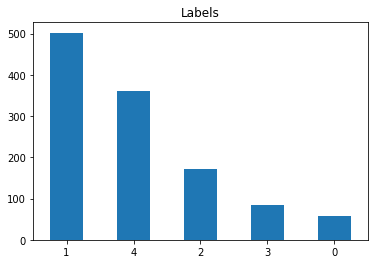

In [47]:
#Displays the elements contained into each cluster 
to_clusterize['cluster'].value_counts().plot(kind='bar', title='Labels')
plt.xticks(rotation=0)
plt.show()

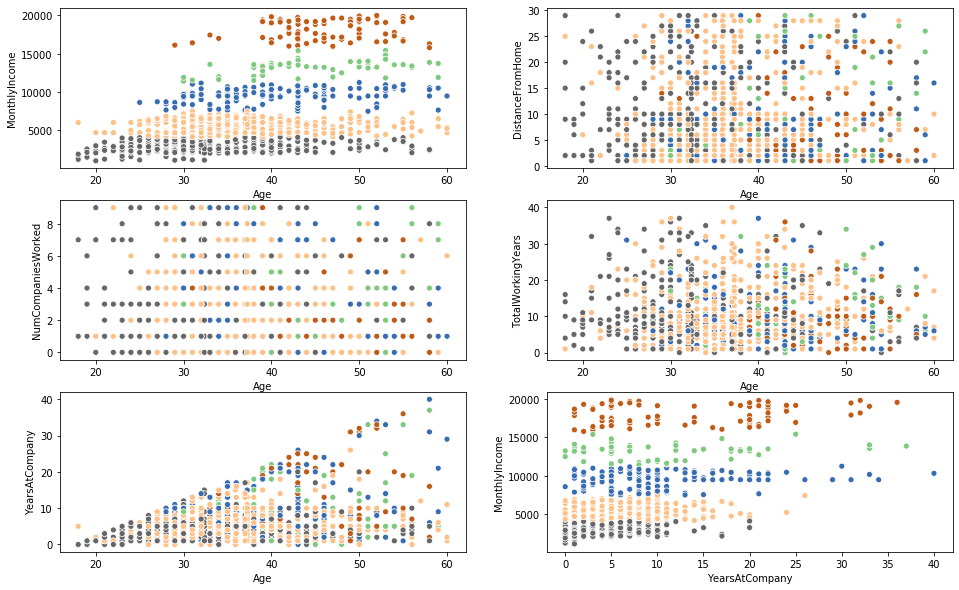

In [48]:
import seaborn as sns 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (16,10))

sns.scatterplot(x = "Age", y = "MonthlyIncome", data = to_clusterize, hue = "cluster", ax = ax1, palette = "Accent", legend=False)
sns.scatterplot(x = "Age", y = "DistanceFromHome", data = to_clusterize, hue = "cluster", ax = ax2, palette = "Accent", legend=False)
sns.scatterplot(x = "Age", y = "NumCompaniesWorked", data = to_clusterize, hue = "cluster", ax = ax3, palette = "Accent", legend=False)
sns.scatterplot(x = "Age", y = "TotalWorkingYears", data = to_clusterize, hue = "cluster", ax = ax4, palette = "Accent", legend=False)
sns.scatterplot(x = "Age", y = "YearsAtCompany", data = to_clusterize, hue = "cluster", ax = ax5, palette = "Accent", legend=False)
sns.scatterplot(x = "YearsAtCompany", y = "MonthlyIncome", data = to_clusterize, hue = "cluster", ax = ax6, palette = "Accent", legend=False)

C:\Users\scucc\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\scucc\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


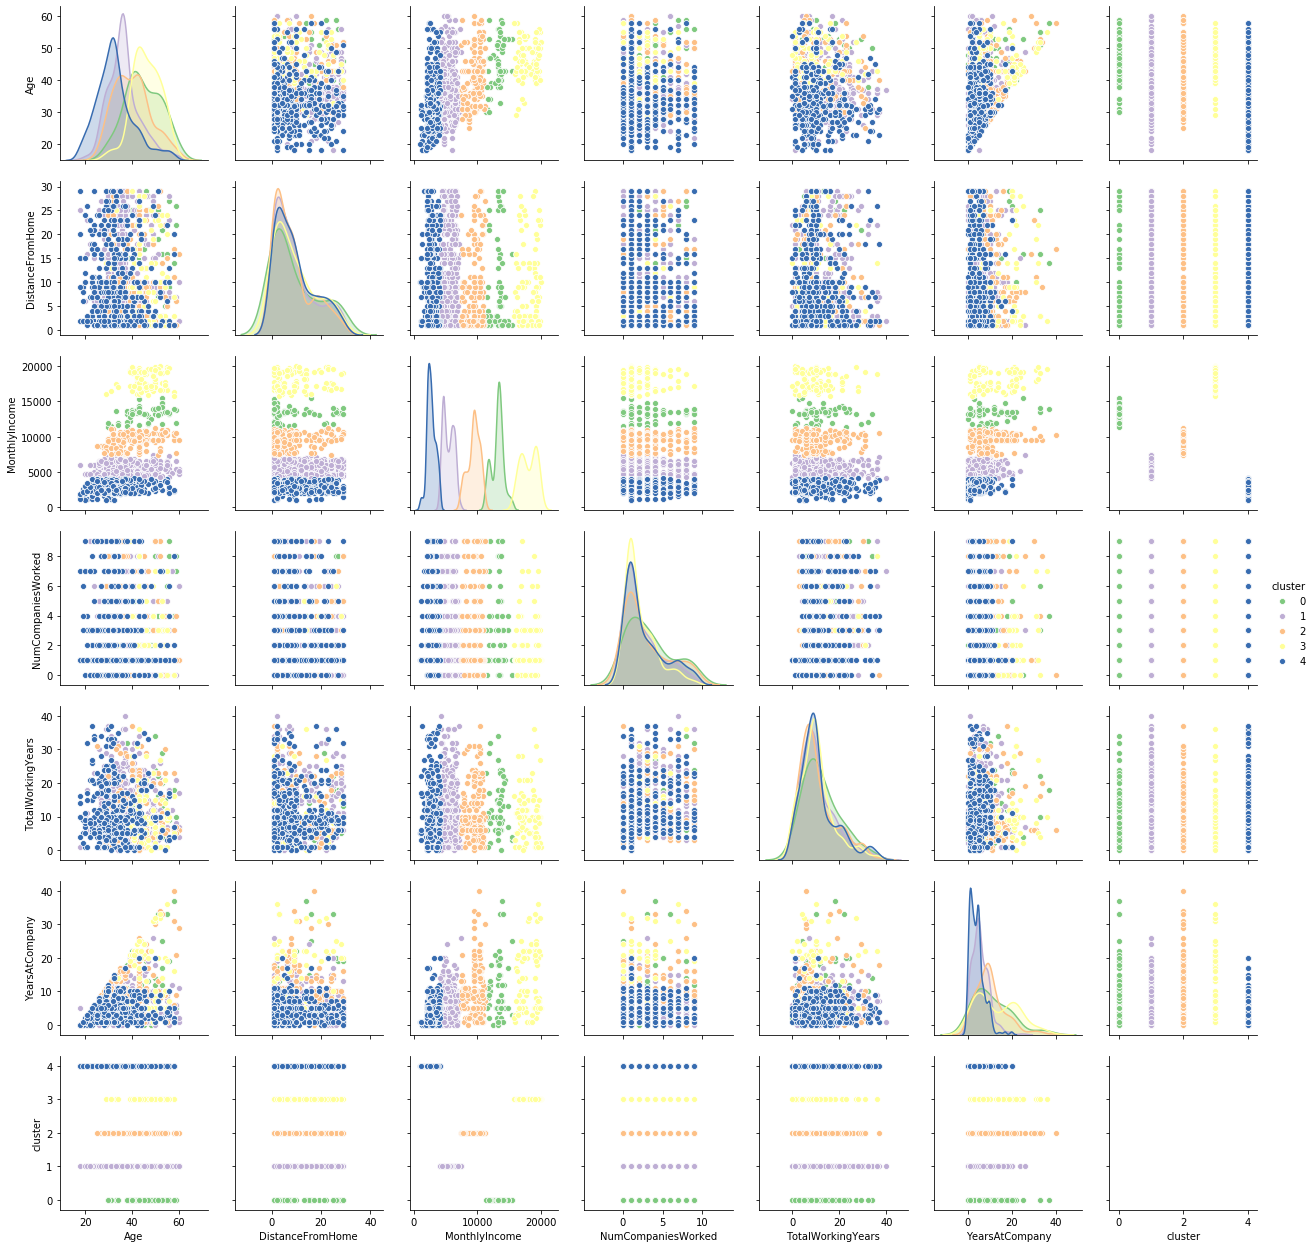

In [49]:
import seaborn as sns

sns.pairplot(data = to_clusterize, hue = "cluster", palette = "Accent")
plt.show()

In [28]:
#print statistical description for each cluster
for i in range(0, to_clusterize['cluster'].max() + 1): 
    print('Description for cluster ', i)
    print(to_clusterize[to_clusterize['cluster']==i].describe())

Description for cluster  0
              Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
count  265.000000        265.000000     265.000000          265.000000   
mean    36.597778          8.343396    4785.054945            2.532075   
std      7.067720          7.582813     347.925731            2.402632   
min     20.000000          1.000000    4148.000000            0.000000   
25%     32.000000          2.000000    4615.000000            1.000000   
50%     35.906122          6.000000    4689.757785            1.000000   
75%     40.000000         10.000000    5006.000000            4.000000   
max     60.000000         29.000000    5507.000000            9.000000   

       TotalWorkingYears  YearsAtCompany  cluster  
count         265.000000      265.000000    265.0  
mean           10.867925        5.271698      0.0  
std             7.719117        4.295187      0.0  
min             0.000000        0.000000      0.0  
25%             6.000000        2.000000      

In [10]:
###DBSCAN - NEW

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
#from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler

In [11]:
to_push = ['Age', 'DistanceFromHome','Education','EnvironmentSatisfaction',
           'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
           'NumCompaniesWorked','RelationshipSatisfaction','TotalWorkingYears',
           'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
           'YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_2 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'] 

subset_3 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsMean'] 

to_push_4 = ['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
             'TotalWorkingYears','YearsAtCompany'] 

to_push_5 = ['Age', 'DistanceFromHome','Education','JobLevel',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsMean'] 

SUBSET = ['HourlyRate','DailyRate','MonthlyRate','DistanceFromHome',
            'MonthlyIncome','TotalWorkingYears','Age','YearsAtCompany']

df = pd.read_csv("./Dataset/attrition.csv")

cleaned_df=df[SUBSET]
X = StandardScaler().fit_transform(cleaned_df.values)
scaled_df = pd.DataFrame( X, columns = cleaned_df.columns )

In [25]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2.5, 0.1)]
min_samples_to_test = range(5, 15, 1)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4]
MIN_SAMPLES: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [26]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric 
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 5).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric 
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    
    # Log     
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

In [27]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [28]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, scaled_df, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 1.358    0
  2 | Tested with eps = 0.1 and min_samples =   6 | 1.358    0
  3 | Tested with eps = 0.1 and min_samples =   7 | 1.358    0
  4 | Tested with eps = 0.1 and min_samples =   8 | 1.358    0
  5 | Tested with eps = 0.1 and min_samples =   9 | 1.358    0
  6 | Tested with eps = 0.1 and min_samples =  10 | 1.358    0
  7 | Tested with eps = 0.1 and min_samples =  11 | 1.358    0
  8 | Tested with eps = 0.1 and min_samples =  12 | 1.358    0
  9 | Tested with eps = 0.1 and min_samples =  13 | 1.358    0
 10 | Tested with eps = 0.1 and min_samples =  14 | 1.358    0
 11 | Tested with eps = 0.2 and min_samples =   5 | 1.358    0
 12 | Tested with eps = 0.2 and min_samples =   6 | 1.358    0
 13 | Tested with eps = 0.2 and min_samples =   7 | 1.358    0
 14 | Tested with eps = 0.2 and min_samples =   8

130 | Tested with eps = 1.3 and min_samples =  14 | 1.491    1
131 | Tested with eps = 1.4 and min_samples =   5 | 1.715    3
132 | Tested with eps = 1.4 and min_samples =   6 | 1.695    2
133 | Tested with eps = 1.4 and min_samples =   7 | 1.679    3
134 | Tested with eps = 1.4 and min_samples =   8 | 1.647    1
135 | Tested with eps = 1.4 and min_samples =   9 | 1.628    1
136 | Tested with eps = 1.4 and min_samples =  10 | 1.618    1
137 | Tested with eps = 1.4 and min_samples =  11 | 1.606    1
138 | Tested with eps = 1.4 and min_samples =  12 | 1.597    1
139 | Tested with eps = 1.4 and min_samples =  13 | 1.587    1
140 | Tested with eps = 1.4 and min_samples =  14 |  1.58    1
141 | Tested with eps = 1.5 and min_samples =   5 | 1.799    5
142 | Tested with eps = 1.5 and min_samples =   6 | 1.765    3
143 | Tested with eps = 1.5 and min_samples =   7 |  1.75    4
144 | Tested with eps = 1.5 and min_samples =   8 | 1.715    3
145 | Tested with eps = 1.5 and min_samples =   9 | 1.7

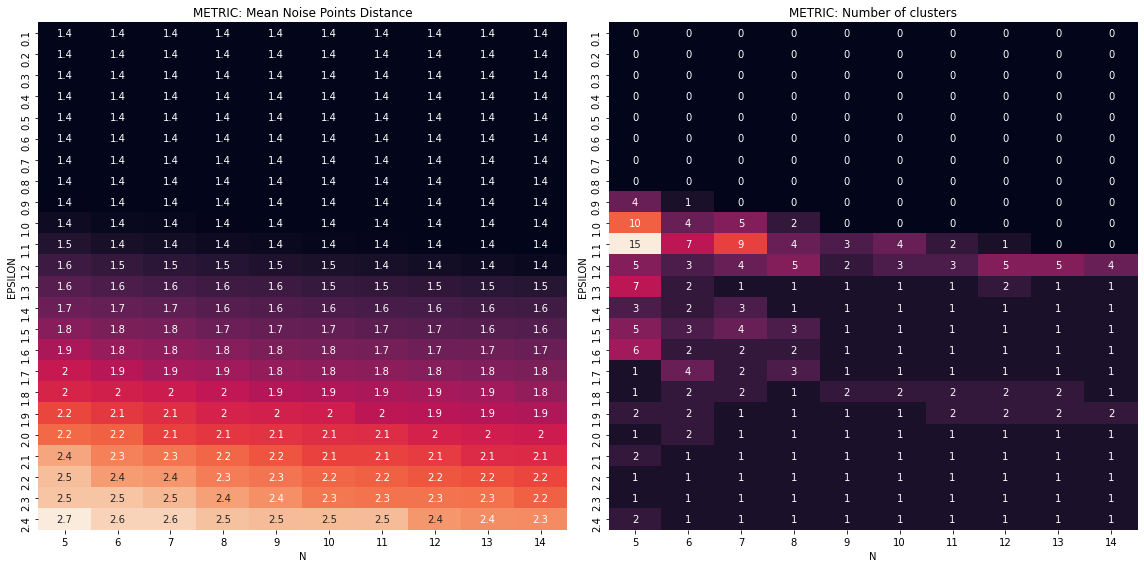

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

Text(0.5, 0, 'sorted distances')

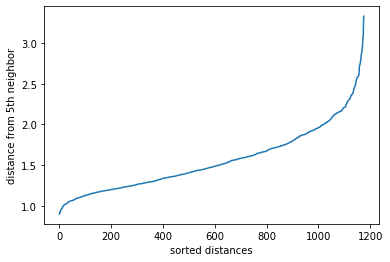

In [41]:
#NEW
from scipy.spatial.distance import pdist, squareform
dist = pdist(X,"euclidean")
dist = squareform(dist)

k=5
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.plot( range(0,len(kth_distances)), sorted(kth_distances) )
plt.ylabel('distance from 5th neighbor',fontsize=10)
plt.xlabel('sorted distances',fontsize=10)

In [51]:
for k in np.arange(0.8,3,0.1):
    for m in np.arange(5,16,1):

        # Istantiating with eps = 1 and min_samples = 9 
        best_dbscan_model = DBSCAN( eps = k, min_samples = m)

        # Fitting
        best_dbscan_model.fit(scaled_df)

        # Balance
        print(f"eps:{k} min:{m}")
        print(np.unique(best_dbscan_model.labels_,return_counts=True))
        print("\n")


eps:0.8 min:5
(array([-1]), array([1176]))


eps:0.8 min:6
(array([-1]), array([1176]))


eps:0.8 min:7
(array([-1]), array([1176]))


eps:0.8 min:8
(array([-1]), array([1176]))


eps:0.8 min:9
(array([-1]), array([1176]))


eps:0.8 min:10
(array([-1]), array([1176]))


eps:0.8 min:11
(array([-1]), array([1176]))


eps:0.8 min:12
(array([-1]), array([1176]))


eps:0.8 min:13
(array([-1]), array([1176]))


eps:0.8 min:14
(array([-1]), array([1176]))


eps:0.8 min:15
(array([-1]), array([1176]))


eps:0.9 min:5
(array([-1,  0,  1,  2,  3]), array([1156,    5,    5,    4,    6]))


eps:0.9 min:6
(array([-1,  0]), array([1170,    6]))


eps:0.9 min:7
(array([-1]), array([1176]))


eps:0.9 min:8
(array([-1]), array([1176]))


eps:0.9 min:9
(array([-1]), array([1176]))


eps:0.9 min:10
(array([-1]), array([1176]))


eps:0.9 min:11
(array([-1]), array([1176]))


eps:0.9 min:12
(array([-1]), array([1176]))


eps:0.9 min:13
(array([-1]), array([1176]))


eps:0.9 min:14
(array([-1]), array([1176

eps:1.8999999999999997 min:8
(array([-1,  0]), array([ 122, 1054]))


eps:1.8999999999999997 min:9
(array([-1,  0]), array([ 128, 1048]))


eps:1.8999999999999997 min:10
(array([-1,  0]), array([ 134, 1042]))


eps:1.8999999999999997 min:11
(array([-1,  0,  1]), array([ 158, 1003,   15]))


eps:1.8999999999999997 min:12
(array([-1,  0,  1]), array([166, 994,  16]))


eps:1.8999999999999997 min:13
(array([-1,  0,  1]), array([177, 983,  16]))


eps:1.8999999999999997 min:14
(array([-1,  0,  1]), array([190, 970,  16]))


eps:1.8999999999999997 min:15
(array([-1,  0,  1]), array([198, 962,  16]))


eps:1.9999999999999998 min:5
(array([-1,  0]), array([  52, 1124]))


eps:1.9999999999999998 min:6
(array([-1,  0,  1]), array([  58, 1113,    5]))


eps:1.9999999999999998 min:7
(array([-1,  0]), array([  74, 1102]))


eps:1.9999999999999998 min:8
(array([-1,  0]), array([  82, 1094]))


eps:1.9999999999999998 min:9
(array([-1,  0]), array([  88, 1088]))


eps:1.9999999999999998 min:10
(array

In [56]:
# Istantiating with eps = 1.8 and min_samples = 11
best_dbscan_model = DBSCAN( eps = 1.8, min_samples = 11)

# Fitting
best_dbscan_model.fit(scaled_df)

# Balance
print(np.unique(best_dbscan_model.labels_,return_counts=True))
print("\n")


(array([-1,  0,  1]), array([209, 954,  13]))




<ipython-input-57-bc144d2d297a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["LABEL"] = best_dbscan_model.labels_


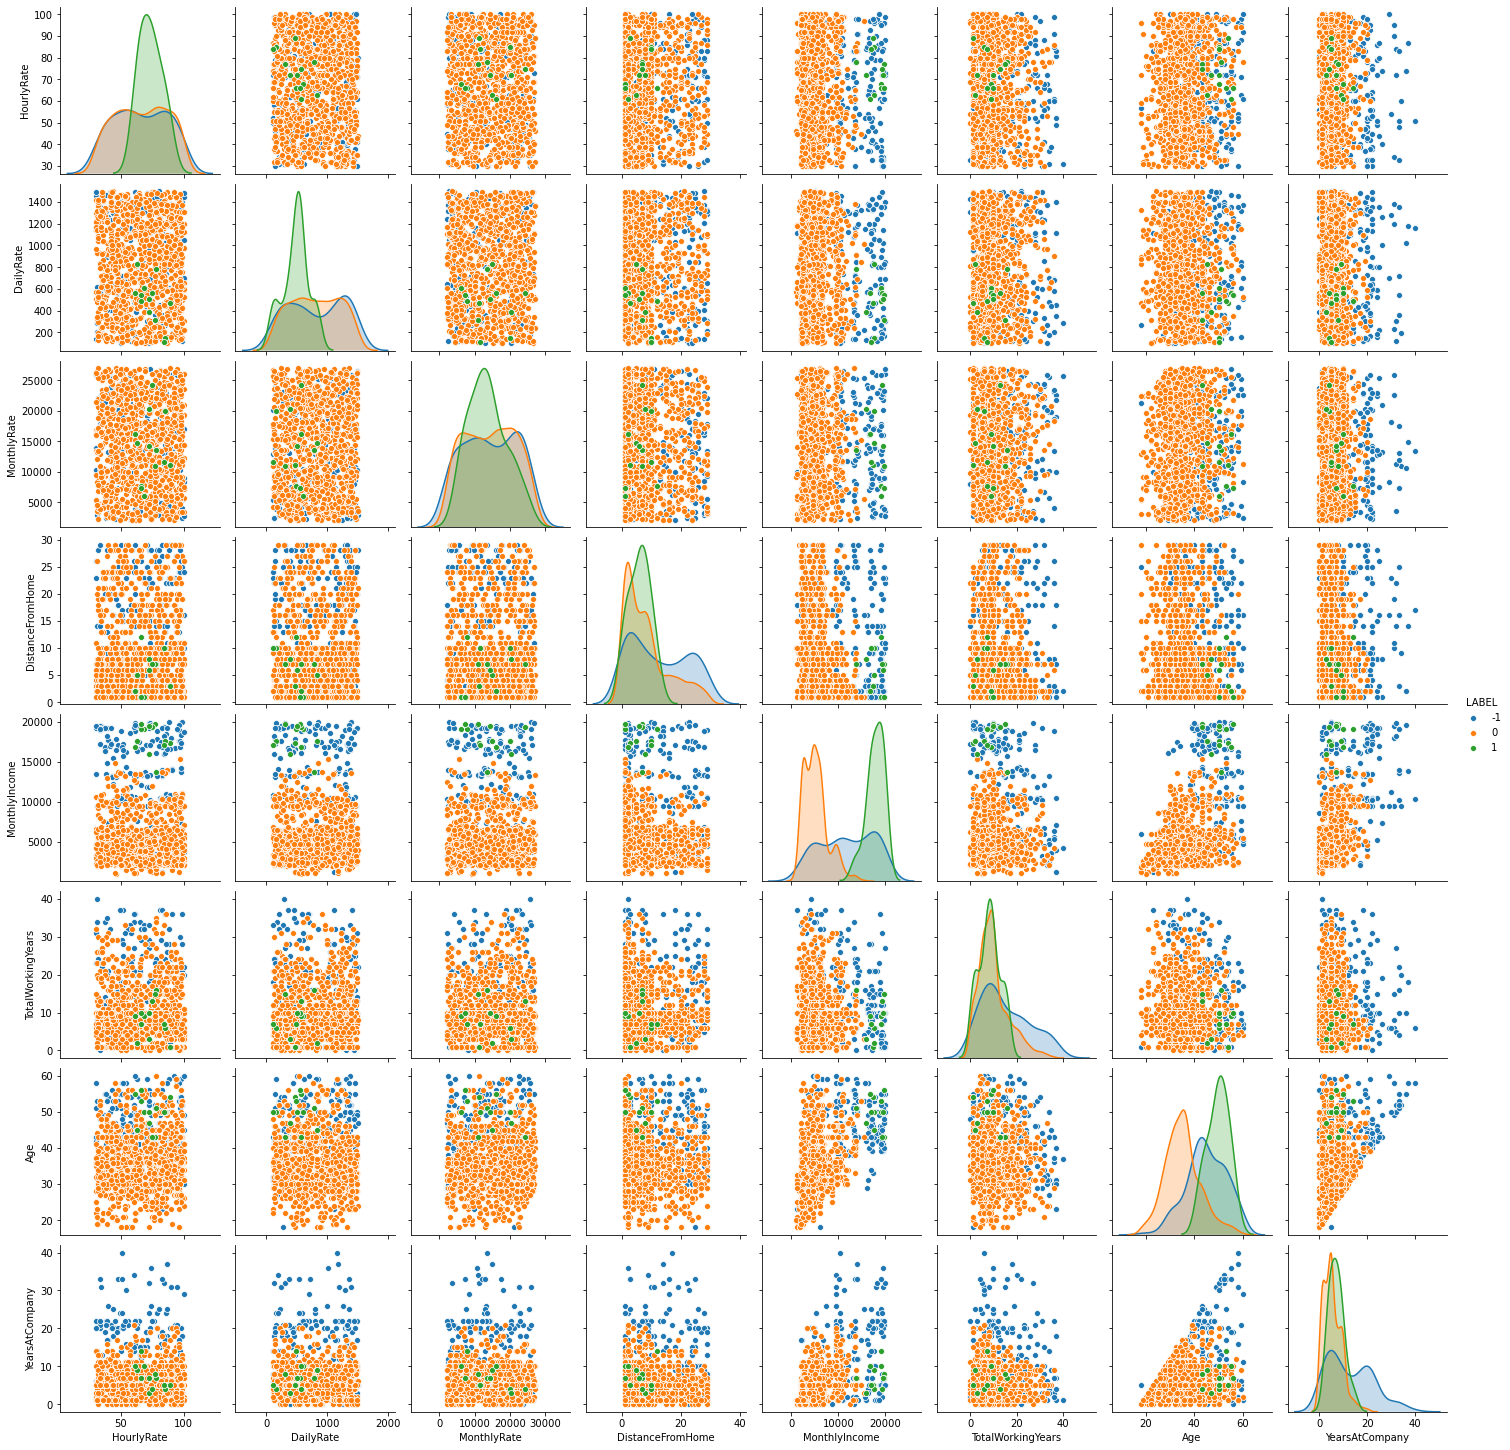

In [57]:
# Extracting labels
scaled_df["LABEL"] = best_dbscan_model.labels_
cleaned_df["LABEL"] = best_dbscan_model.labels_


# Pairplot
sns.pairplot( cleaned_df, hue = "LABEL" ); plt.show()

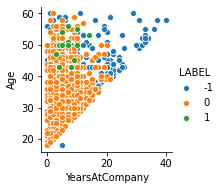

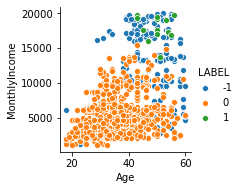

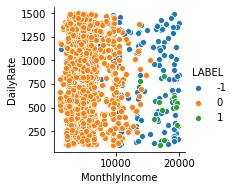

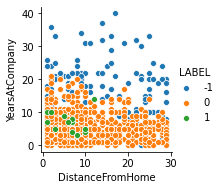

In [58]:
# Pairplot
sns.pairplot( cleaned_df, y_vars=['Age'], 
             x_vars=['YearsAtCompany'],
             hue = "LABEL" ); 
sns.pairplot( cleaned_df, y_vars=['MonthlyIncome'], 
             x_vars=['Age'],
             hue = "LABEL" ); 
sns.pairplot( cleaned_df, y_vars=['DailyRate'], 
             x_vars=['MonthlyIncome'],
             hue = "LABEL" ); 
sns.pairplot( cleaned_df, y_vars=['YearsAtCompany'], 
             x_vars=['DistanceFromHome'],
             hue = "LABEL" ); 



plt.show()



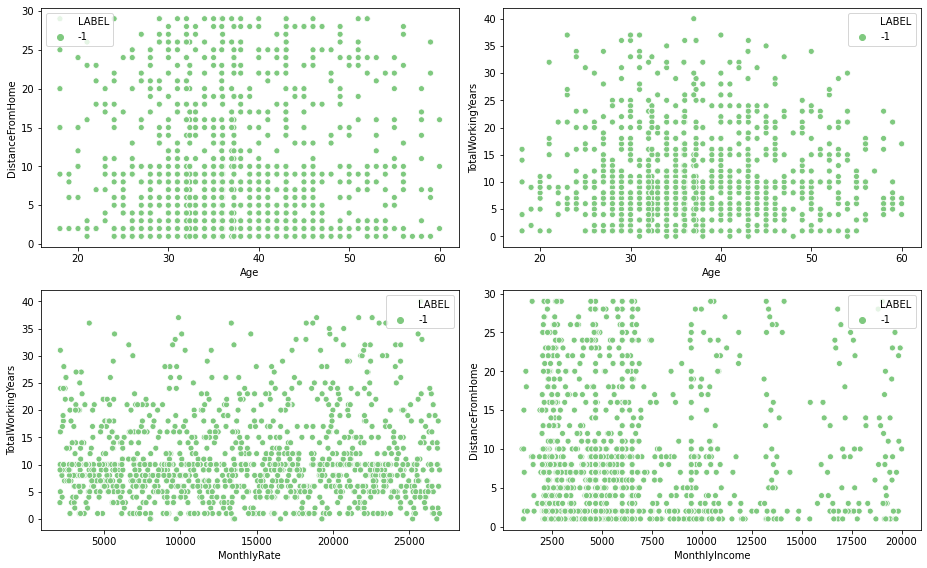

In [55]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sns.scatterplot(x = "Age", y = "DistanceFromHome", data = cleaned_df, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "Age", y = "TotalWorkingYears", data = cleaned_df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "MonthlyRate", y = "TotalWorkingYears", data = cleaned_df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "MonthlyIncome", y = "DistanceFromHome", data = cleaned_df, hue = "LABEL", palette = "Accent", ax = ax4)

plt.tight_layout()
plt.show()

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

In [28]:
df = pd.read_csv("Dataset//Attrition.csv")
cleaned_df=df[SUBSET]
X = StandardScaler().fit_transform(cleaned_df.values)
scaled_df = pd.DataFrame( X, columns = cleaned_df.columns )

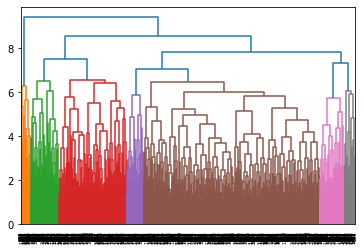

In [29]:
data_dist = pdist(scaled_df,metric='euclidean')
data_link = linkage(data_dist, method='complete',metric='euclidean')
res = dendrogram(data_link)

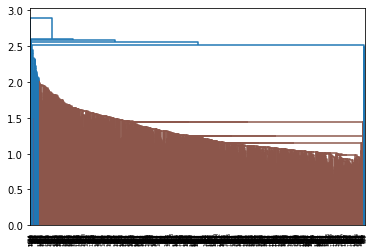

In [30]:
data_link = linkage(data_dist, method='single',metric='euclidean')
res = dendrogram(data_link)

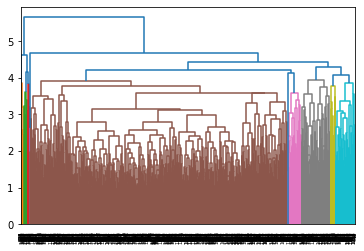

In [31]:
data_link = linkage(data_dist, method='average',metric='euclidean')
res = dendrogram(data_link)

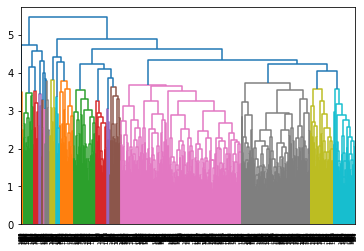

In [32]:
data_link = linkage(data_dist, method='weighted',metric='euclidean')
res = dendrogram(data_link)

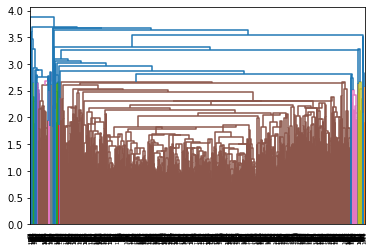

In [33]:
data_link = linkage(data_dist, method='centroid',metric='euclidean')
res = dendrogram(data_link)

In [36]:
#consideriamo solo il 10% del dataset
scaled_df = scaled_df[:176]
len(scaled_df)

176

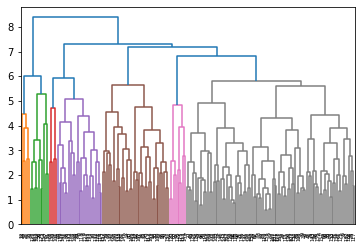

In [37]:
data_dist = pdist(scaled_df,metric='euclidean')
data_link = linkage(data_dist, method='complete',metric='euclidean')
res = dendrogram(data_link)

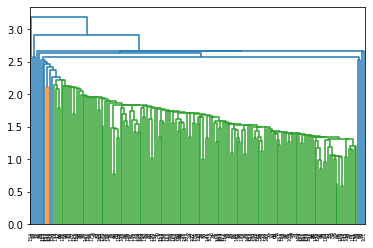

In [38]:
data_link = linkage(data_dist, method='single',metric='euclidean')
res = dendrogram(data_link)

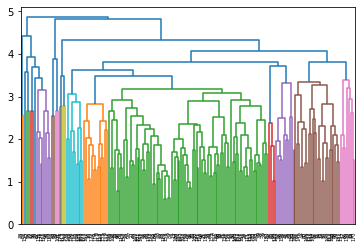

In [39]:
data_link = linkage(data_dist, method='average',metric='euclidean')
res = dendrogram(data_link)

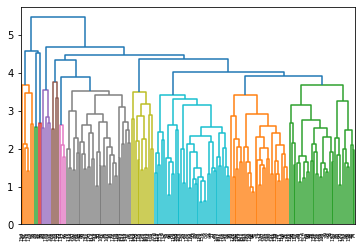

In [40]:
data_link = linkage(data_dist, method='weighted',metric='euclidean')
res = dendrogram(data_link)

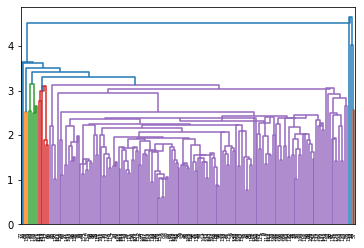

In [41]:
data_link = linkage(data_dist, method='centroid',metric='euclidean')
res = dendrogram(data_link)